# Group Lab  3 

## Cleaning & Preparing Data for Future Analysis

In [ ]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

### Steam Data

Steam is the world's most popular PC Gaming hub. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools can be super valuable for Steam. What can we learn about Steam gaming behavior?

The dataset we will be analyzing is comprised of a random sample of 500 steam users and their game play and purchase behaviors. It has the following columns:
* user_id
* game_name,
* activity:
    - purchase: indicating that the user has *purchased* the corresponding game
    - play: indicating that the user has *played* the corresponding game (for at least some amount of time.) 
* hours_played_if_play:
    - if the row corresponds to a 'play' activity, this number represents the number of hours the user has played the game
    - if the row corresponds to a 'purchase' activity, this number is always a 1 (and means nothing... it's a placeholder).

Observational units in this data frame are defined by the user-game combination.

For this lab, you will be preparing the dataset for future analysis.  To do this, you will need to clean the data as requested below.  

### 1. Preparing in the Data

We will again be analyzing the steam data, using the same data as Lab 2 and Homework 3.

First, read in a cleaned version of the steam_sample.csv file into a dataframe.  You do not need to show all steps used to prepare the data, but you should prepare your data by having all **missing values** correctly identified as missing by Python and dropping all rows with a missing value.

In [4]:
df = pd.read_csv('steam_sample.csv')

In [7]:
df = pd.read_csv('steam_sample.csv', na_values ='unknown')

In [52]:
df.dropna()

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1.0
1,308653033,Unturned,play,0.6
2,308653033,theHunter,purchase,1.0
3,144004384,Dota 2,purchase,1.0
4,144004384,Dota 2,play,22.0
...,...,...,...,...
7801,99096740,SimCity 4 Deluxe,play,0.2
7802,99096740,BioShock Infinite Burial at Sea - Episode 2,purchase,1.0
7803,99096740,The Elder Scrolls V Skyrim - Dawnguard,purchase,1.0
7804,99096740,The Elder Scrolls V Skyrim - Dragonborn,purchase,1.0


In [8]:
df.dtypes

user_id                   int64
game_name                object
activity                 object
hours_played_if_play    float64
dtype: object

### 2. Pick Two Games

Select two games of your choosing from the data other than Counter-Strike and Sid Meier's Civilization V, which are analyzed in Homework 3.  Perform the following steps to analyze the amount of time users played each game.

**a)** Plot two histograms, one for the number of hours played for each of these two games.  Make sure your histograms have clear labels and titles.

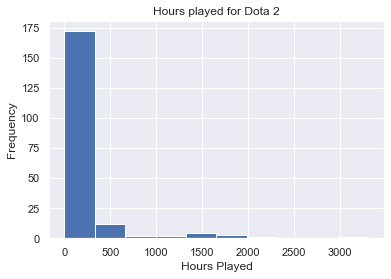

In [43]:
Dota2 = df[df['game_name']=='Dota 2']
Dota2 = Dota2[Dota2['activity']=='play']
Dota2['hours_played_if_play'].hist()
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Hours played for Dota 2')
plt.show()

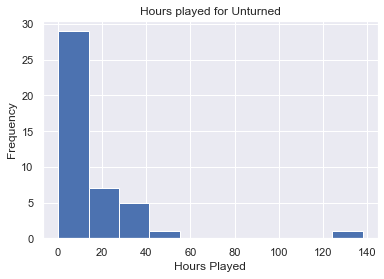

In [44]:
Unturned = df[df['game_name']=='Unturned']
Unturned = Unturned[Unturned['activity']=='play']
Unturned['hours_played_if_play'].hist()
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Hours played for Unturned')
plt.show()

**b)** Describe and compare the shapes of these histograms.

The hours played are skewed left in both histograms. 

The skewness is more higher for the game 'Dota2' than the game 'Unturned'. 



**c)** Calculate and compare a measure of center for the number of hours played for each of these two games.  Explain why you chose your particular measure of center.

In [45]:
Dota2['hours_played_if_play'].median()

4.8

In [46]:
Unturned['hours_played_if_play'].median()

4.5

The reason I chose median for a measure of center is there are extreme hours that have been played, so the mean value of the hours_played are too large. This does not represent a proper measure of center. 

**d)** Calculate and compare a measure of spread for the number of hours played for each of these two games.  Explain why you chose your particular measure of spread.

In [47]:
Dota2['hours_played_if_play'].std()

430.4688471478012

In [48]:
Unturned['hours_played_if_play'].std()

23.08324863755846

The reason I chose standard deviation as a measure of spread for the number of hours played is 

**e)** Calculate the cutoff points for observations to be considered an outlier for each of these two games.  Would you consider the set of cutoff points to be similar or different?

In [49]:
Q1 = Dota2 ['hours_played_if_play'].quantile(q=0.25)
Q3 = Dota2['hours_played_if_play'].quantile(q=0.75)
IQR = Q3 - Q1
cutoff_1 = Q1 - 1.5 * IQR
cutoff_2 = Q3 + 1.5 * IQR
print(cutoff_1, Q1, Q3, cutoff_2)

-100.49999999999999 1.2 69.0 170.7


In [50]:
q1 = Unturned ['hours_played_if_play'].quantile(q=0.25)
q3 = Unturned['hours_played_if_play'].quantile(q=0.75)
iqr = q3 - q1
cutoff_11 = q1 - 1.5 * iqr
cutoff_22 = q3 + 1.5 * iqr
print(cutoff_11, q1, q3, cutoff_22)

-24.300000000000008 1.6500000000000001 18.950000000000003 44.900000000000006


The lower cutoff point for both games (q1 - 1.5*iqr) had a negative value, so we should not consider the lower cutoff points. 

The cutoff point for game 'Dota 2' is 170.7 (hours) and the point for game Unturned is 45 (hours). This should be different because the hour played for game 'Dota 2' was more skewed to left when we plotted a histogram. This means, there were higher values (hours played) for the game 'Dota 2'. This concludes that the cutoff for 'Dota 2' is higher than 'Unturned'. 

### 3. Probability Calculation

Select one of the games from the two games you selected in Question 2 to further explore how popular that game is.  We will work to determine how popular that game is, based on how often the game is purchased and based on if the game has been played for our Steam users.

**a)** If a single game were to be randomly selected from the games (rows) that were purchased in this dataset, what is the probability that it is your selected game?

In [53]:
purchased_df = df[df['activity']=='purchase']
len(purchased_df)

4931

In [55]:
len(purchased_df[purchased_df['game_name']=='Unturned'])/len(purchased_df)

0.01095112553234638

**b)** Now, take a random sample of the user-game combinations (rows) of games that have been purchased of size 1000 with replacement.  Be sure to set the random_state beforehand, so that this sampling is replicable; you may choose any value for your random state.  Based on this random sample, what proportion of the games are your selected game.

In [58]:
random_sample = purchased_df.sample(1000,replace = True, random_state= 123 )

In [61]:
sum(random_sample['game_name'] == 'Unturned')

11

In [62]:
11/ 1000

0.011

0.011

**c)** We'll continue examining the same game's popularity, now based on if that game is played.  If a single game were to be randomly selected from the user-game combination (rows) that have been played, what is the probability that it is your selected game?

In [64]:
played_df = df[df['activity']=='play']
random_sample_played = played_df.sample(1000,replace = True, random_state= 123 )

In [66]:
sum(random_sample_played['game_name'] == 'Unturned') / 1000

0.017

0.017

**d)** Finally, take a random sample of the user-game combinations (rows) of games that have been played of size 1000 with replacement.  Be sure to set the random_state beforehand, so that this sampling is replicable; you may choose any random state.  Based on this random sample, what proportion of the games are your selected game.

In [67]:
random_sampling = df.sample(1000, replace=True, random_state=123)

In [68]:
sum(random_sampling['game_name'] == 'Unturned') / 1000

0.01

0.01

**e)** Does the popularity of your game of interest differ based on whether it is played or purchased?  Explain your answer.

The popularity of my game of interest does differ based on whether it is played or purchased. The difference is little, but there surely was a difference bwtween the probabilites. 

0.01095112553234638

0.011

0.017

0.01



